In [1]:
import numpy as np
import pandas as pd

import os
import glob

import matplotlib.pyplot as plt

from statcast_batter_analysis import Batter,Game,AtBat

In [2]:
df = pd.read_csv('Data/2021/Dodgers.csv')
#df = pd.read_csv('Data/aggregated-data.csv')

In [3]:
df = df.rename(columns={'events':'event_result','description':'event'})

In [4]:
excluded_events = ['foul_bunt','missed_bunt','hit_by_pitch','bunt_foul_tip']

In [5]:
excluded_results = ['hit_by_pitch','sac_bunt','catcher_interf']

In [6]:
df.shape

(24466, 92)

In [7]:
for event in excluded_events:
    df = df[df['event']!=event]

In [8]:
for result in excluded_results:
    df = df[df['event_result']!=result]

In [9]:
df.shape

(24271, 92)

In [10]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,event_result,event,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,SL,2021-10-03,85.8,0.80,6.20,"Turner, Trea",607208,676879,home_run,hit_into_play,...,1,1,6,6,1,Standard,Standard,342.0,0.227,3.129
1,SL,2021-10-03,85.1,0.92,6.21,"Turner, Trea",607208,676879,NaN,called_strike,...,1,1,2,2,1,Standard,Standard,320.0,0.000,-0.238
2,SI,2021-10-03,97.5,0.65,6.30,"Turner, Trea",607208,676879,NaN,ball,...,1,1,2,2,1,Standard,Standard,137.0,0.000,0.353
3,CH,2021-10-03,89.9,0.87,6.23,"Turner, Trea",607208,676879,NaN,ball,...,1,1,2,2,1,Standard,Standard,124.0,0.000,0.100
4,CU,2021-10-03,79.1,0.80,6.28,"Turner, Trea",607208,676879,NaN,ball,...,1,1,2,2,1,Standard,Standard,330.0,0.000,0.070


In [11]:
players = df['player_name'].unique()

In [12]:
batters = []
for player in players:
    print(player)
    player_df = df[df['player_name']==player]
    print(player_df.shape)
    batter = Batter(player,player_df,process_games=False)
    print(batter.zone_height/batter.zone_width)
    
    batters.append(batter)

Turner, Trea
(839, 92)
1.0239999999999998
Bellinger, Cody
(1428, 92)
1.1291428571428572
Seager, Corey
(1392, 92)
1.0891428571428572
Lux, Gavin
(1437, 92)
1.0217142857142856
Beaty, Matt
(874, 92)
1.0502857142857143
Betts, Mookie
(2221, 92)
0.9925714285714285
Buehler, Walker
(321, 92)
0.992
Taylor, Chris
(2373, 92)
1.062857142857143
Jackson, Andre
(16, 92)
1.0937142857142859
Turner, Justin
(2453, 92)


/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['isStrike'] = (self.data['plate_x'] >= self.sz_left) & (self.data['plate_x'] <= self.sz_right) & (
/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:330: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['isSwing'] = (self.data['event']=='hit_into_play') | (self.data['event']=='foul') | (
/Users/jacobhow/Documents/statcast-batter-analy

/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['dist_to_inside'] = dist_to_inside
/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:285: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['dist_to_outside'] = dist_to_outside
/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:286: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

1.0474285714285716
Pollock, AJ
(1458, 92)
1.06
Pujols, Albert
(769, 92)
1.0457142857142858
Smith, Will
(2062, 92)
1.0045714285714287
Barnes, Austin
(884, 92)
1.0074285714285713
Muncy, Max
(2423, 92)
0.9645714285714285
Urías, Julio
(205, 92)
1.036
Vesia, Alex
(19, 92)
1.0491428571428572
Gonsolin, Tony
(73, 92)
1.0879999999999999
Knebel, Corey
(5, 92)
1.1074285714285714
Scherzer, Max
(99, 92)
1.0388571428571427
Kershaw, Clayton
(153, 92)
1.054285714285714
Raley, Luke
(267, 92)
1.0765714285714285
White, Mitch
(58, 92)


/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:283: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['vert_dist_to_edge'] = vert_dist_to_edge
/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['dist_to_inside'] = dist_to_inside
/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:285: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

1.0931428571428572
Souza Jr., Steven
(146, 92)
1.082857142857143
McKinney, Billy
(404, 92)
1.0171428571428571
Phillips, Evan
(16, 92)
1.0411428571428571
McKinstry, Zach
(706, 92)
1.024
Price, David
(46, 92)
1.0822857142857143
Graterol, Brusdar
(4, 92)
1.0919999999999999
Uceta, Edwin
(21, 92)
1.0651428571428572
Bruihl, Justin
(5, 92)
1.0708571428571427
Ramírez, Yefry
(1, 92)
1.0742857142857143
Bickford, Phil
(8, 92)
1.0662857142857145
Neuse, Sheldon
(261, 92)
1.036
Gray, Josiah
(11, 92)
1.0645714285714285
Reks, Zach
(46, 92)
1.0525714285714285
Sherfy, Jimmie
(3, 92)
1.0400000000000003
Cleavinger, Garrett
(8, 92)
0.9794285714285714
Nelson, Jimmy
(11, 92)
1.0799999999999998
Bauer, Trevor
(129, 92)
1.0497142857142856
Burns, Andy
(68, 92)
1.0325714285714285
Kelly, Joe
(12, 92)
1.0337142857142856
Tsutsugo, Yoshi
(130, 92)
1.0074285714285716
Jones, Nate
(2, 92)
1.0514285714285714
Peters, DJ
(126, 92)
1.086285714285714
Jansen, Kenley
(4, 92)
1.0919999999999999
Santana, Dennis
(7, 92)
1.0999999

/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:279: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['dist_to_center'] = dist_to_center
/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:280: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['horiz_dist_to_edge'] = horiz_dist_to_edge
/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:281: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [13]:
def sortFunc(x):
    return x.data.shape[0]

batters.sort(reverse=True,key=sortFunc)

In [14]:
batter = batters[0]

In [15]:
print(batter)

Turner, Justin


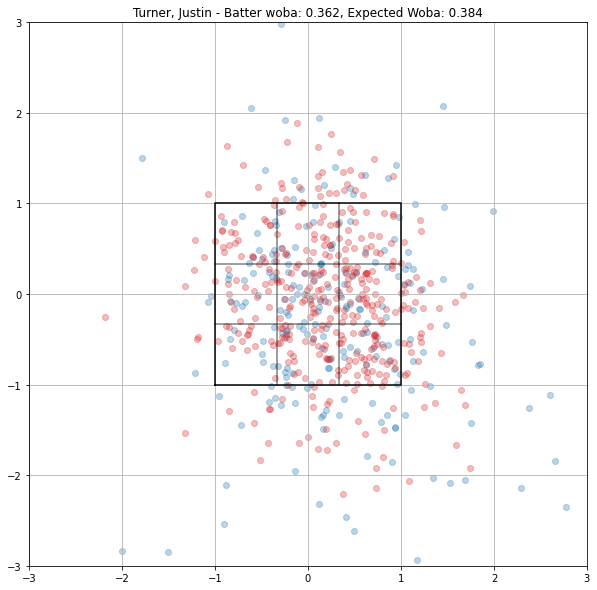

In [16]:
BL = (-1,-1)
TL = (-1,1)
TR = (1,1)
BR = (1,-1)

woba_df = batter.data[batter.data['woba_denom']==1]

successful_woba_df = woba_df[woba_df['woba_value']>0]
unsuccessful_woba_df = woba_df[woba_df['woba_value']==0]

batter_woba = woba_df['woba_value'].round(3).mean()
batter_xwoba = woba_df['estimated_woba_using_speedangle'].round(3).mean()

fig,ax = plt.subplots(figsize=(10,10))

ax.set_title(f'{batter} - Batter woba: {batter_woba:.3f}, Expected Woba: {batter_xwoba:.3f}')

x = [it[0] for it in (BL,TL,TR,BR,BL)]
y = [it[1] for it in (BL,TL,TR,BR,BL)]

ax.plot(x,y,color='k')

# Horizontals
ax.plot([-1,1],[0.333,0.333],color='k',alpha=.5)
ax.plot([-1,1],[-0.333,0.-.333],color='k',alpha=.5)

# Verticals
ax.plot([-0.333,-0.333],[1,-1],color='k',alpha=.5)
ax.plot([0.333,0.333],[1,-1],color='k',alpha=.5)

ax.scatter(successful_woba_df['prop_plate_x'],successful_woba_df['prop_plate_z'],color='tab:blue',alpha=.3)
ax.scatter(unsuccessful_woba_df['prop_plate_x'],unsuccessful_woba_df['prop_plate_z'],color='tab:red',alpha=.3)

ax.grid()

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
plt.show()

In [17]:
from scipy import signal

In [18]:
baseball_diameter = .25  # Diameter of baseball in ft (3in)

In [19]:
baseball_radius = baseball_diameter / 2

In [20]:
prop_diameter = baseball_diameter / batter.zone_half_width
prop_diameter

0.2857142857142857

In [21]:
strikezone_bins = 60

In [22]:
zone_center = strikezone_bins * 1.5

In [23]:
prop_bin_width = 2 / strikezone_bins

In [24]:
s = signal.gaussian(17,4)
s

array([0.13533528, 0.21626517, 0.32465247, 0.45783336, 0.60653066,
       0.7548396 , 0.8824969 , 0.96923323, 1.        , 0.96923323,
       0.8824969 , 0.7548396 , 0.60653066, 0.45783336, 0.32465247,
       0.21626517, 0.13533528])

In [25]:
kernel_width = int(len(s) / 2)
kernel_width

8

In [26]:
kernel_length = len(s)
kernel = np.zeros((kernel_length,kernel_length))
for i in np.arange(kernel_length):
    for j in np.arange(kernel_length):
        kernel[i,j] = s[i] * s[j]

In [27]:
bins = np.zeros((strikezone_bins*3,strikezone_bins*3))

In [28]:
pitches = batter.data[batter.data['estimated_woba_using_speedangle'].notna()]
pitches

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,event_result,event,...,dist_to_top,dist_to_btm,vert_dist_to_edge,dist_to_inside,dist_to_outside,dist_to_zone,prop_plate_x,prop_plate_z,norm_plate_x,prop_dist_to_zone
40,FF,2021-10-03,93.8,-3.14,5.80,"Turner, Justin",457759,519326,field_out,hit_into_play,...,0.071,-1.904,0.071,-0.985,-0.765,0.071,0.125714,1.077469,0.11,1.077469
136,SI,2021-10-03,94.8,-1.31,5.86,"Turner, Justin",457759,594311,field_out,hit_into_play,...,-0.639,-1.194,-0.639,-0.765,-0.985,-0.639,-0.125714,0.302782,-0.11,0.302782
154,FF,2021-10-03,85.4,2.64,6.22,"Turner, Justin",457759,608718,field_out,hit_into_play,...,-0.839,-0.994,-0.839,0.285,-2.035,0.285,-1.325714,0.084561,-1.16,1.325714
163,SI,2021-10-02,91.0,-1.66,5.68,"Turner, Justin",457759,607067,field_out,hit_into_play,...,-0.299,-1.534,-0.299,-0.185,-1.565,-0.185,-0.788571,0.673759,-0.69,0.788571
192,FC,2021-10-02,83.9,-1.30,5.78,"Turner, Justin",457759,607067,field_out,hit_into_play,...,-0.769,-1.064,-0.769,-1.255,-0.495,-0.495,0.434286,0.160938,0.38,0.434286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24276,KC,2021-04-01,85.7,-1.69,6.25,"Turner, Justin",457759,608566,field_out,hit_into_play,...,-0.499,-1.334,-0.499,-1.555,-0.195,-0.195,0.777143,0.455537,0.68,0.777143
24324,FF,2021-04-01,94.7,-1.59,6.17,"Turner, Justin",457759,608566,single,hit_into_play,...,-1.319,-0.514,-0.514,-0.865,-0.885,-0.514,-0.011429,-0.439171,-0.01,0.439171
24335,FC,2021-04-01,87.8,-1.39,5.94,"Turner, Justin",457759,592346,sac_fly,hit_into_play,...,-1.379,-0.454,-0.454,-1.505,-0.245,-0.245,0.720000,-0.504637,0.63,0.720000
24388,SL,2021-04-01,91.1,-0.89,6.56,"Turner, Justin",457759,641755,field_out,hit_into_play,...,-0.519,-1.314,-0.519,-1.155,-0.595,-0.519,0.320000,0.433715,0.28,0.433715


In [29]:
pitches.shape

(440, 108)

In [30]:
# Woba
# woba normalize to mean
# woba normalized to threshold value
# exit velocity
# xWoba
# xWoba normalized to mean

In [31]:
for i in pitches.index:
    pitch = pitches.loc[i]

    xLoc = pitch.loc['prop_plate_x']
    yLoc = pitch.loc['prop_plate_z']
    
    if np.isnan(pitch.loc['prop_plate_x']) or np.isnan(pitch.loc['prop_plate_z']):
        continue
    
    xBin = int(zone_center + pitch.loc['prop_plate_x'] / prop_bin_width)
    yBin = int(zone_center + pitch.loc['prop_plate_z'] / prop_bin_width)
    
    if yBin < kernel_width or yBin > (strikezone_bins*3 - kernel_width - 1):
        continue
    if xBin < kernel_width or xBin > (strikezone_bins*3 - kernel_width - 1):
        continue
    
    bins[yBin-kernel_width:yBin+kernel_width+1,xBin-kernel_width:xBin+kernel_width+1] += (kernel * pitch.loc['estimated_woba_using_speedangle'])

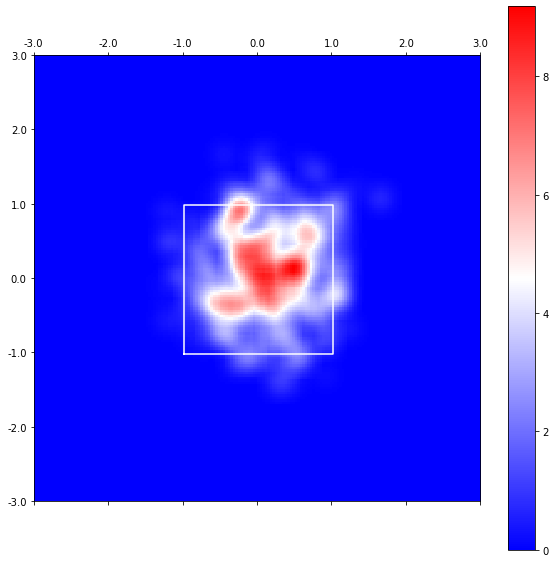

In [32]:
fig,ax = plt.subplots(figsize=(10,10))

im = ax.matshow(bins,cmap='bwr')
ax.plot([60,120,120,60,60],[120,120,60,60,120],color='w')
ax.plot()
plt.colorbar(im)

ax.set_xticks(np.arange(-.5,180,30))
ax.set_xticklabels(np.arange(-3,3.1,1))

ax.set_yticks(np.arange(-.5,180,30))
ax.set_yticklabels(np.arange(3,-3.1,-1))

plt.show()

In [33]:
cumulative_woba_median = bins.max() / 2
cumulative_woba_median

4.593253386971308

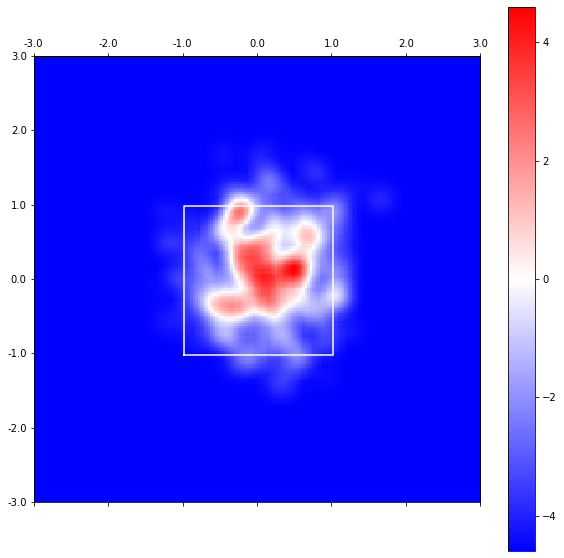

In [34]:
fig,ax = plt.subplots(figsize=(10,10))

im = ax.matshow(bins - cumulative_woba_median,cmap='bwr')
ax.plot([60,120,120,60,60],[120,120,60,60,120],color='w')
ax.plot()
plt.colorbar(im)

ax.set_xticks(np.arange(-.5,180,30))
ax.set_xticklabels(np.arange(-3,3.1,1))

ax.set_yticks(np.arange(-.5,180,30))
ax.set_yticklabels(np.arange(3,-3.1,-1))

plt.show()

In [35]:
import scipy as sp
blurred_bins = sp.ndimage.gaussian_filter(bins,sigma=5)

In [36]:
blurred_cumulative_woba_median = blurred_bins.max() / 2

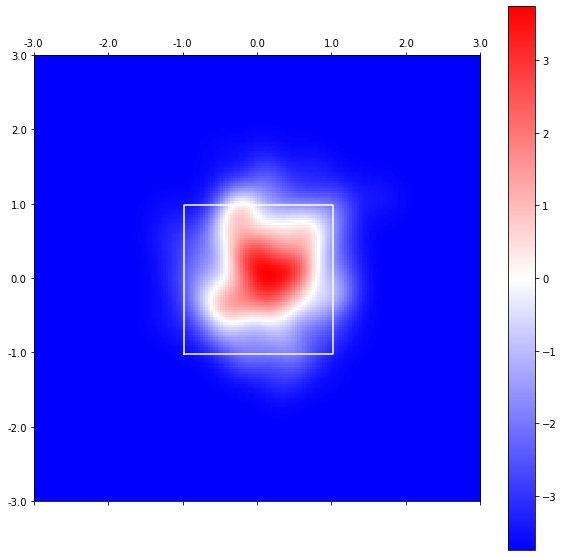

In [37]:
fig,ax = plt.subplots(figsize=(10,10))

im = ax.matshow(blurred_bins - blurred_cumulative_woba_median,cmap='bwr')
ax.plot([60,120,120,60,60],[120,120,60,60,120],color='w')
ax.plot()
plt.colorbar(im)

ax.set_xticks(np.arange(-.5,180,30))
ax.set_xticklabels(np.arange(-3,3.1,1))

ax.set_yticks(np.arange(-.5,180,30))
ax.set_yticklabels(np.arange(3,-3.1,-1))

plt.show()

In [38]:
pitches['event'].unique()

array(['hit_into_play'], dtype=object)

In [39]:
pitches['event_result'].unique()

array(['field_out', 'home_run', 'single', 'double', 'sac_fly_double_play',
       'force_out', 'sac_fly', 'grounded_into_double_play',
       'fielders_choice', 'field_error', 'fielders_choice_out'],
      dtype=object)

In [40]:
batter.calculate_total_wOBA()

0.362

In [41]:
batter.calculate_zone_wOBA()

0.369

In [42]:
blurred_bins[60:121,60:121].max()

7.476269818282631

In [43]:
blurred_bins.max()

7.476269818282631

In [44]:
zone_median = np.median(blurred_bins[60:121,60:121])
zone_median

3.2215023031699146

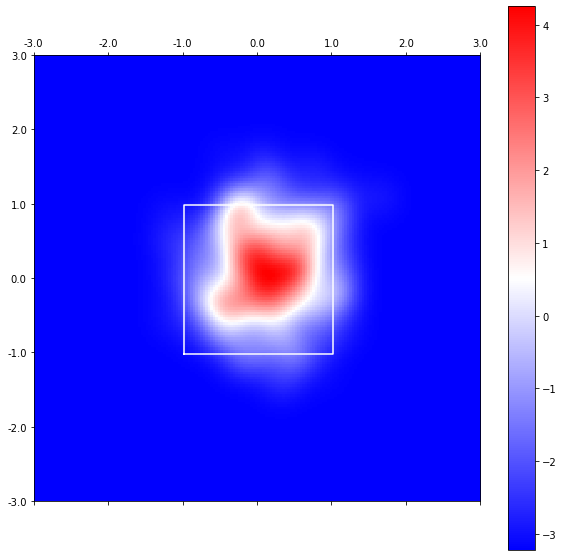

In [45]:
fig,ax = plt.subplots(figsize=(10,10))

im = ax.matshow(blurred_bins - zone_median,cmap='bwr')
ax.plot([60,120,120,60,60],[120,120,60,60,120],color='w')
ax.plot()
plt.colorbar(im)

ax.set_xticks(np.arange(-.5,180,30))
ax.set_xticklabels(np.arange(-3,3.1,1))

ax.set_yticks(np.arange(-.5,180,30))
ax.set_yticklabels(np.arange(3,-3.1,-1))

plt.show()

In [46]:
print(batter)

Turner, Justin


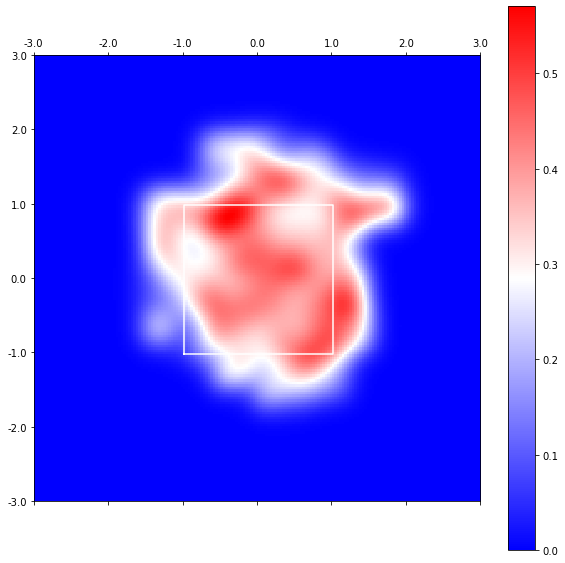

In [47]:
batter.plot_wOBA_heatmap()

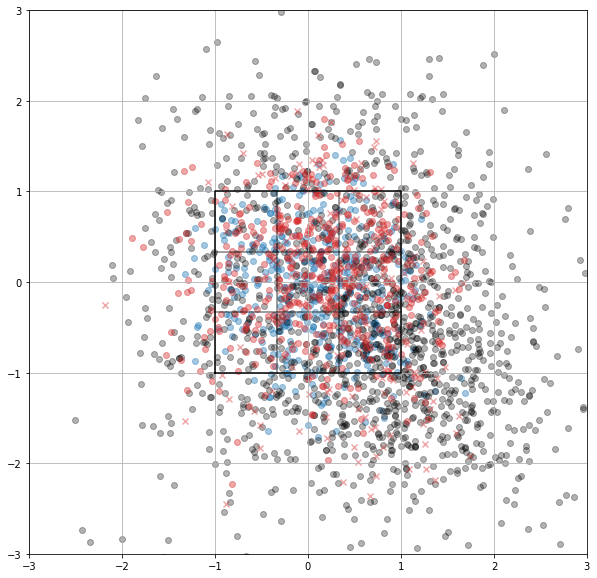

In [48]:
batter.plot_pitch_scatter()

Turner, Justin


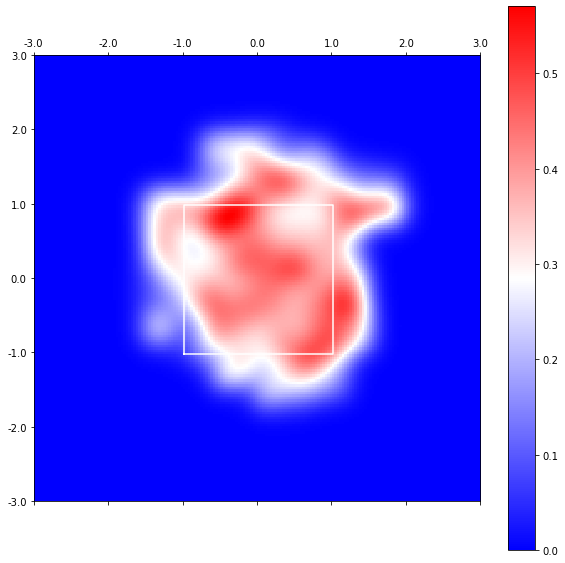

Muncy, Max


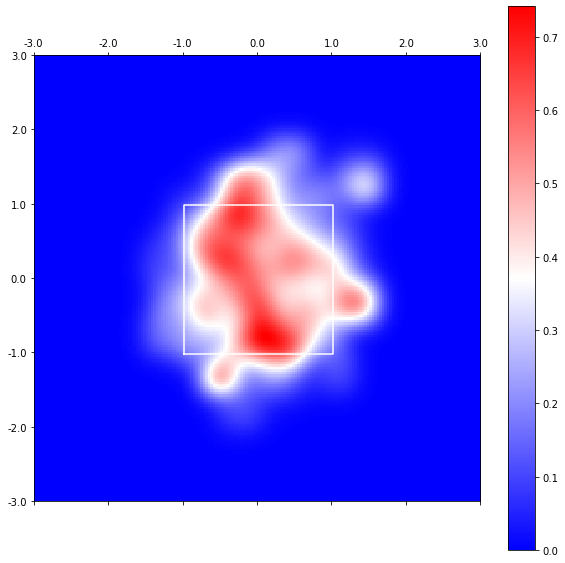

Taylor, Chris


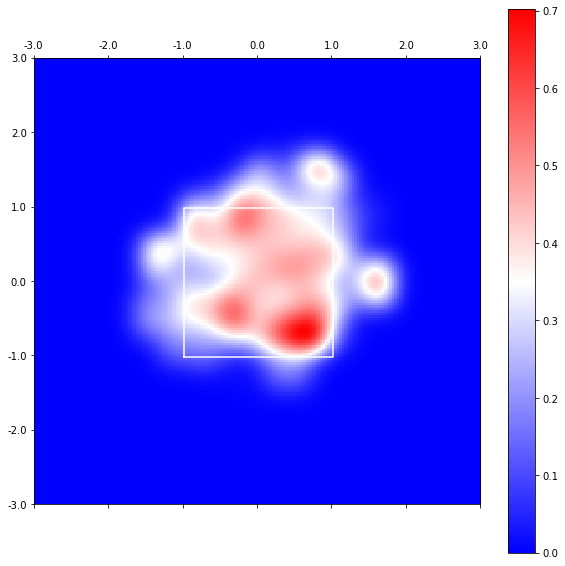

Betts, Mookie


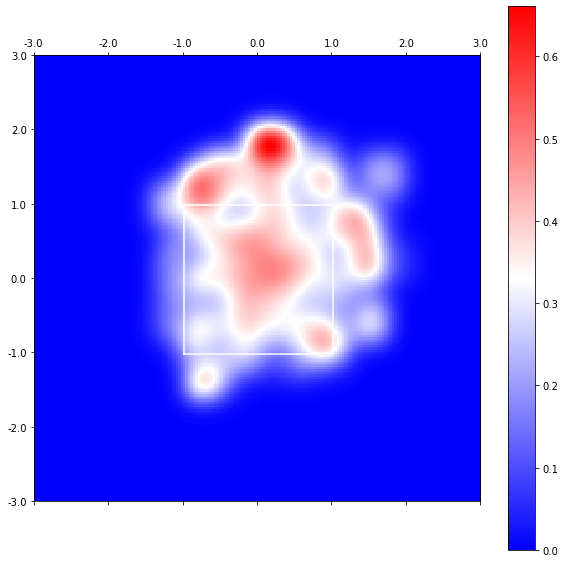

Smith, Will


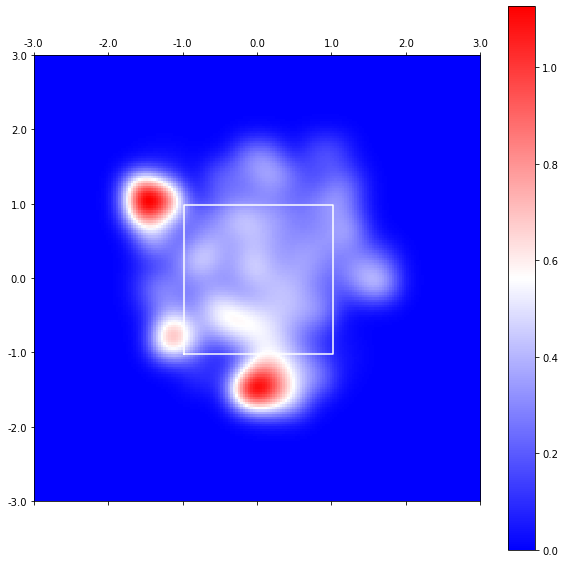

In [49]:
for batter in batters[:5]:
    print(batter)
    batter.plot_wOBA_heatmap()

In [50]:
batter.data.keys()[20:40]

Index(['away_team', 'type', 'hit_location', 'bb_type', 'balls', 'strikes',
       'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b',
       'on_1b', 'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated'],
      dtype='object')

In [51]:
batter.data['balls'].unique()

array([3, 2, 0, 1])

In [52]:
batter.data['strikes'].unique()

array([2, 1, 0])

In [53]:
strike_values = [0,1]
ball_values = [0,1,2,3]

In [54]:
strikezone_bins = 60
zone_center = strikezone_bins * 1.5
prop_bin_width = 2 / strikezone_bins

In [55]:
df = batter.data[batter.data['isStrike']==True]

In [56]:
swings = df[df['isSwing']==True]
takes = df[df['isSwing']==False]

In [57]:
for ball_value in ball_values:
    for strike_value in strike_values:
        _df = df[(df['balls']==ball_value) & (df['strikes']==strike_value)]
        print(f'Count: {ball_value}-{strike_value} - Events: {_df.shape[0]}')

Count: 0-0 - Events: 254
Count: 0-1 - Events: 121
Count: 1-0 - Events: 95
Count: 1-1 - Events: 100
Count: 2-0 - Events: 48
Count: 2-1 - Events: 66
Count: 3-0 - Events: 20
Count: 3-1 - Events: 30


In [58]:
for ball_value in ball_values:
    for strike_value in strike_values:
        _swings = swings[(swings['balls']==ball_value) & (swings['strikes']==strike_value)]
        _takes = takes[(takes['balls']==ball_value) & (takes['strikes']==strike_value)]
        
        count_swing_approach_score = 0
        swing_pitch_count = 0
        for i in _swings.index:
            pitch = _swings.loc[i]

            xLoc = pitch.loc['prop_plate_x']
            yLoc = pitch.loc['prop_plate_z']
            
            if np.isnan(xLoc) or np.isnan(yLoc):
                continue
            
            xBin = int(zone_center + xLoc / prop_bin_width)
            yBin = int(zone_center + yLoc / prop_bin_width)
            
            bin_value = bins[yBin,xBin]
            
            count_swing_approach_score += bin_value
            swing_pitch_count += 1
        
        count_take_approach_score = 0
        take_pitch_count = 0
        for i in _takes.index:
            pitch = _takes.loc[i]

            xLoc = pitch.loc['prop_plate_x']
            yLoc = pitch.loc['prop_plate_z']
            
            if np.isnan(xLoc) or np.isnan(yLoc):
                continue
            
            xBin = int(zone_center + xLoc / prop_bin_width)
            yBin = int(zone_center + yLoc / prop_bin_width)
            
            bin_value = bins[yBin,xBin]
            
            count_take_approach_score -= bin_value
            take_pitch_count += 1
            
        count_approach_score = count_swing_approach_score + count_take_approach_score
        
        if (swing_pitch_count + take_pitch_count) == 0:
            count_approach_score_avg = 0
        else:
            count_approach_score_avg = count_approach_score / (swing_pitch_count + take_pitch_count)
            
        if swing_pitch_count == 0:
            count_swing_approach_score_avg = 0
        else:
            count_swing_approach_score_avg = count_swing_approach_score / swing_pitch_count
            
        if take_pitch_count == 0:
            count_take_approach_score_avg = 0
        else:
            count_take_approach_score_avg = count_take_approach_score / take_pitch_count
            
        print(f'Count: {ball_value}-{strike_value} - Total: {count_approach_score:.1f}, Swing: {count_swing_approach_score:.1f}, Take: {count_take_approach_score:.1f}')
        print(f'             Avg: {count_approach_score_avg:.1f}, Swing Avg: {count_swing_approach_score_avg:.1f}, Take Avg: {count_take_approach_score_avg:.1f}')

Count: 0-0 - Total: -294.4, Swing: 389.9, Take: -684.3
             Avg: -1.2, Swing Avg: 4.6, Take Avg: -4.0
Count: 0-1 - Total: 195.7, Swing: 323.2, Take: -127.4
             Avg: 1.6, Swing Avg: 3.9, Take Avg: -3.3
Count: 1-0 - Total: 16.0, Swing: 207.4, Take: -191.4
             Avg: 0.2, Swing Avg: 4.5, Take Avg: -3.9
Count: 1-1 - Total: 162.8, Swing: 279.9, Take: -117.1
             Avg: 1.6, Swing Avg: 4.1, Take Avg: -3.7
Count: 2-0 - Total: 11.0, Swing: 111.2, Take: -100.2
             Avg: 0.2, Swing Avg: 4.3, Take Avg: -4.6
Count: 2-1 - Total: 141.9, Swing: 207.4, Take: -65.5
             Avg: 2.2, Swing Avg: 4.1, Take Avg: -4.1
Count: 3-0 - Total: -75.2, Swing: 2.2, Take: -77.3
             Avg: -3.8, Swing Avg: 2.2, Take Avg: -4.1
Count: 3-1 - Total: 34.9, Swing: 72.6, Take: -37.7
             Avg: 1.2, Swing Avg: 3.5, Take Avg: -4.2


In [59]:
strike_value = 2
for ball_value in ball_values:
    _df = batter.data[(batter.data['balls']==ball_value) & (batter.data['strikes']==strike_value)]
    
    count_correct_swing_decision = batter.calculate_correct_swing_decision_rate(df=_df)
    count_chase_rate = batter.calculate_chase_rate(df=_df)
    count_chase_rate_scale = batter.calculate_chase_rate_linear_scaling(df=_df)
    
    print(f'Count: {ball_value}-{strike_value} - Correct Decsision Rate: {count_correct_swing_decision}, Chase Rate: {count_chase_rate}, Chase Rate Scale: {count_chase_rate_scale}')

Count: 0-2 - Correct Decsision Rate: 0.762, Chase Rate: 0.239, Chase Rate Scale: 1.431
Count: 1-2 - Correct Decsision Rate: 0.763, Chase Rate: 0.336, Chase Rate Scale: 1.362
Count: 2-2 - Correct Decsision Rate: 0.727, Chase Rate: 0.404, Chase Rate Scale: 1.343
Count: 3-2 - Correct Decsision Rate: 0.777, Chase Rate: 0.386, Chase Rate Scale: 1.335


In [60]:
print(batter)

Smith, Will


In [61]:
approach_scores = batter.calculate_approach_score_by_counts()

In [62]:
approach_scores

{'0-0': {'approach score': -196.34,
  'swing approach score': 261.59,
  'take approach score': -457.92,
  'approach score avg': -0.77,
  'swing approach score avg': 3.11,
  'take approach score avg': -2.69,
  'total pitches': 254,
  'swing count': 84,
  'take count': 170},
 '0-1': {'approach score': 144.54,
  'swing approach score': 231.18,
  'take approach score': -86.63,
  'approach score avg': 1.19,
  'swing approach score avg': 2.82,
  'take approach score avg': -2.22,
  'total pitches': 121,
  'swing count': 82,
  'take count': 39},
 '1-0': {'approach score': 25.88,
  'swing approach score': 142.44,
  'take approach score': -116.56,
  'approach score avg': 0.27,
  'swing approach score avg': 3.1,
  'take approach score avg': -2.38,
  'total pitches': 95,
  'swing count': 46,
  'take count': 49},
 '1-1': {'approach score': 125.95,
  'swing approach score': 199.41,
  'take approach score': -73.46,
  'approach score avg': 1.26,
  'swing approach score avg': 2.93,
  'take approach sco

In [63]:
total_score = 0
total_count = 0
for count_scores in approach_scores.values():
    print(count_scores['approach score'])
    total_score += count_scores['approach score']
    total_count += count_scores['total pitches']
    
print(total_score)
print(total_count)
print(round(total_score/total_count,3))

-196.34
144.54
25.88
125.95
18.95
111.15
-46.23
29.94
213.84
734
0.291


In [64]:
batter.calculate_approach_score()

{'approach score': 846.18,
 'swing approach score': 1810.68,
 'take approach score': -964.5,
 'approach score avg': 0.85,
 'swing approach score avg': 2.96,
 'take approach score avg': -2.51,
 'total pitches': 997,
 'swing count': 612,
 'take count': 385}

In [65]:
batter.calculate_approach_score(ball_value=0,strike_value=0)

{'approach score': -196.34,
 'swing approach score': 261.59,
 'take approach score': -457.92,
 'approach score avg': -0.77,
 'swing approach score avg': 3.11,
 'take approach score avg': -2.69,
 'total pitches': 254,
 'swing count': 84,
 'take count': 170}

In [66]:
batter.calculate_approach_score(ball_value=0,strike_value=1)

{'approach score': 144.54,
 'swing approach score': 231.18,
 'take approach score': -86.63,
 'approach score avg': 1.19,
 'swing approach score avg': 2.82,
 'take approach score avg': -2.22,
 'total pitches': 121,
 'swing count': 82,
 'take count': 39}

In [67]:
batter.calculate_approach_score(ball_value=1,strike_value=0)

{'approach score': 25.88,
 'swing approach score': 142.44,
 'take approach score': -116.56,
 'approach score avg': 0.27,
 'swing approach score avg': 3.1,
 'take approach score avg': -2.38,
 'total pitches': 95,
 'swing count': 46,
 'take count': 49}

In [68]:
batter.calculate_approach_score(ball_value=3,strike_value=0)

{'approach score': -46.23,
 'swing approach score': 4.23,
 'take approach score': -50.45,
 'approach score avg': -2.31,
 'swing approach score avg': 4.23,
 'take approach score avg': -2.66,
 'total pitches': 20,
 'swing count': 1,
 'take count': 19}

In [69]:
batter.data.head()[['balls','strikes']]

,balls,strikes
74,3,2
83,2,2
86,0,1
91,2,2
92,3,1


In [70]:
batter.data.keys()[20:40]

Index(['away_team', 'type', 'hit_location', 'bb_type', 'balls', 'strikes',
       'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b',
       'on_1b', 'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated'],
      dtype='object')

In [71]:
df = batter.data[batter.data['isStrike']==True]

In [72]:
df.shape

(997, 108)

In [73]:
swings = df[df['isSwing']==True]
takes = df[df['isSwing']==False]

In [74]:
swings.shape

(612, 108)

In [75]:
takes.shape

(385, 108)

In [76]:
ball_value = 0
strike_value = 0

_df = swings[(swings['balls']==ball_value) & (swings['strikes']==strike_value)]
_df.shape

(84, 108)

In [77]:
ball_value = 1
strike_value = 0

_df = swings[(swings['balls']==ball_value) & (swings['strikes']==strike_value)]
_df.shape

(46, 108)

In [78]:
ball_value = 1
strike_value = 1

_df = swings[(swings['balls']==ball_value) & (swings['strikes']==strike_value)]
_df.shape

(68, 108)

In [79]:
ball_value = 2
strike_value = 1

_df = swings[(swings['balls']==ball_value) & (swings['strikes']==strike_value)]
_df.shape

(50, 108)

In [80]:
batter.calculate_total_approach_score()

{'total score': 213.84, 'total count': 734, 'total score avg': 0.291}

In [81]:
batter.calculate_two_strike_approach_score()

{'correct swing decision': 0.755,
 'zone swing rate': 0.89,
 'chase rate': 0.34,
 'chase rate scale': 1.363}

In [82]:
batter.calculate_two_strike_approach_scores_by_count()

{'0-2': {'correct swing decision': 0.762,
  'zone swing rate': 0.765,
  'chase rate': 0.239,
  'chase rate scale': 1.431},
 '1-2': {'correct swing decision': 0.763,
  'zone swing rate': 0.915,
  'chase rate': 0.336,
  'chase rate scale': 1.362},
 '2-2': {'correct swing decision': 0.727,
  'zone swing rate': 0.892,
  'chase rate': 0.404,
  'chase rate scale': 1.343},
 '3-2': {'correct swing decision': 0.777,
  'zone swing rate': 0.922,
  'chase rate': 0.386,
  'chase rate scale': 1.335}}

In [83]:
batter.calculate_quality_of_contact()

/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:512: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  babip_df['quality of contact'] = 1 + (babip_df['launch_speed'] - bat_speed) / (babip_df['release_speed'] + bat_speed)
/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:514: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foul_with_launch['quality of contact'] = 1 + (foul_with_launch['launch_speed'] - bat_speed) / (foul_with_launch['release_speed'] + bat

1.033

In [84]:
batter.calculate_max_exit_velocity()

108.7

In [85]:
batter.calculate_average_exit_velocity()

83.5

In [86]:
batter.calculate_average_to_max_exit_velocity_ratio()

0.77

In [87]:
batter.calculate_percent_above_exit_velocity_threshold(0.9)

0.186

In [88]:
batter.calculate_average_launch_angle()

24.0

In [89]:
batter.calculate_stdev_launch_angle()

30.6

In [90]:
batter.calculate_average_launch_angle_of_hard_hit()

20.8

In [91]:
batter.calculate_zone_contact_rate()

0.846

In [92]:
batter.calculate_outside_contact_rate()

0.68

In [93]:
batter.calculate_estimated_bat_speed()

69.7

In [94]:
batter.calculate_estimated_attack_angle()

18.3

In [95]:
100 * 1 + 90 * .5

145.0

In [96]:
145 / 1.5

96.66666666666667

In [97]:
.300 * 1 + .400 * .5

0.5

In [98]:
.5 / 1.5

0.3333333333333333

In [99]:
X = np.array([[1,0,1],
              [1,1,0],
              [0,0,1]])

In [100]:
zero = (X == 0).astype(int)
zero

array([[0, 1, 0],
       [0, 0, 1],
       [1, 1, 0]])

In [101]:
X + zero

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [102]:
bins = batter.calculate_guassian_heatmap()

In [103]:
bin_total = sum(sum(bins))

In [104]:
nBins = sum(sum((bins > 0).astype(int)))

In [105]:
bin_total / nBins

0.17142270734523232

In [106]:
print(batter)

Smith, Will


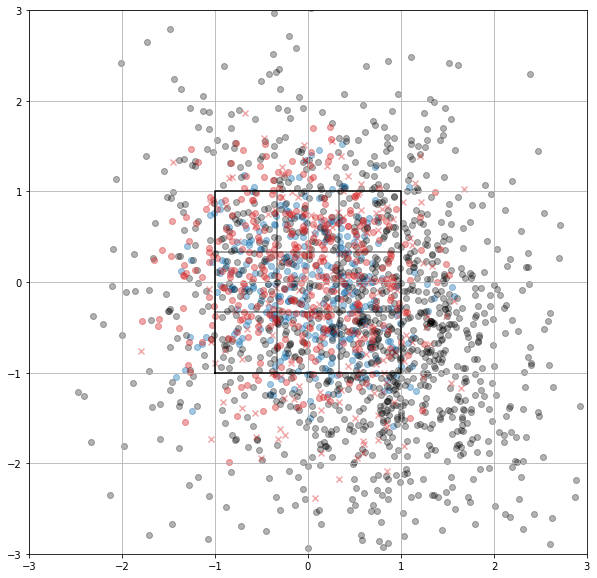

In [107]:
batter.plot_pitch_scatter()